In [2]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

## Defining Problem Object

In [3]:
class MyProblem(ElementwiseProblem):
    
    def __init__(self):
        super().__init__(n_var = 2,
                         n_obj = 2,
                         n_ieq_constr = 2,
                         xl = np.array([-2,-2]),
                         xu = np.array([2,2])
                         )
        
    def _evaluate(self, x, out, *args, **kwargs):
        # Objective Function
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0] - 1)**2 + x[1]**2
        
        # Constraints
        g1 = 2 * (x[0] - 0.1) * (x[0] - 0.9) / 0.18
        g2 = - 20 * (x[0] - 0.4) * (x[0] - 0.6) / 0.48
        
        # Outputs
        out["F"] = [f1,f2]
        out["G"] = [g1,g2]
    
    
problem = MyProblem()

## Defining Algorithm Object

In [4]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling


algorithm = NSGA2(
    pop_size = 40,
    n_offspring = 10,
    sampling = FloatRandomSampling(),
    crossover = SBX(prob=0.9, eta=15),
    mutation = PM(eta=20),
    eliminate_duplicates = True
)

## Termination Criteria

In [7]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 40)

## Optimize

In [8]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed = 1,
               save_history = True,
               verbose = True)

X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |      1 |  0.000000E+00 |  2.363992E+01 |             - |             -
     2 |       80 |      2 |  0.000000E+00 |  2.6773624938 |  1.0000000000 |         ideal
     3 |      120 |      5 |  0.000000E+00 |  0.0743864902 |  0.1598920481 |         ideal
     4 |      160 |      8 |  0.000000E+00 |  0.000000E+00 |  0.1153398028 |         ideal
     5 |      200 |     17 |  0.000000E+00 |  0.000000E+00 |  0.0603241976 |         ideal
     6 |      240 |     23 |  0.000000E+00 |  0.000000E+00 |  0.0054158295 |             f
     7 |      280 |     31 |  0.000000E+00 |  0.000000E+00 |  0.0165049454 |         nadir
     8 |      320 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0047090587 |             f
     9 |      360 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0274192812 |         nadir
    10 |      400 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0066601695 |         nadir

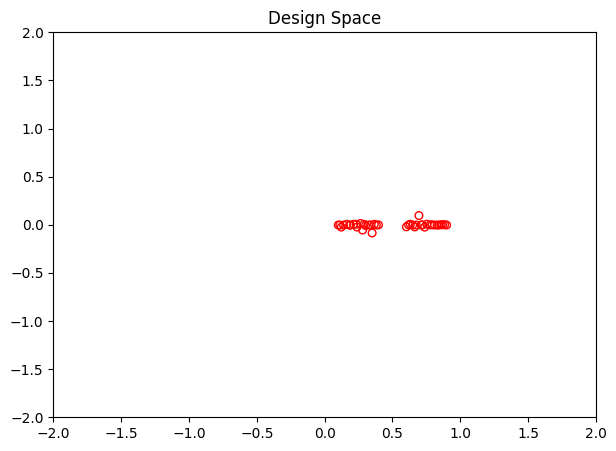

In [9]:
import matplotlib.pyplot as plt

xl,xu = problem.bounds()
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:, 1], s=30, facecolors = 'none', edgecolors= 'r')
plt.xlim(xl[0],xu[0])
plt.ylim(xl[1],xu[1])
plt.title("Design Space")
plt.show()

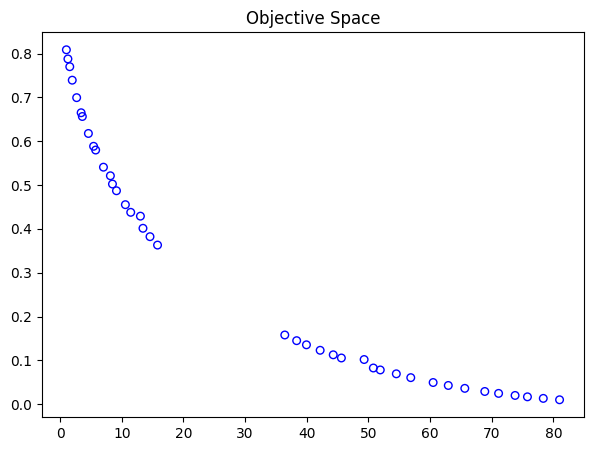

In [11]:
F = res.F
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

In [12]:
X

array([[ 8.99944952e-01, -2.84719669e-03],
       [ 1.00732585e-01, -2.61075723e-03],
       [ 6.03229994e-01, -2.11887105e-02],
       [ 3.97477415e-01, -9.13965628e-04],
       [ 1.63686257e-01,  4.85657654e-03],
       [ 2.14064203e-01,  5.31622114e-03],
       [ 1.40175740e-01, -3.63202249e-03],
       [ 7.77745936e-01, -1.18316469e-03],
       [ 6.95561222e-01,  9.58414296e-02],
       [ 3.25292910e-01, -2.71622426e-03],
       [ 3.02194798e-01, -8.03890911e-03],
       [ 6.49356206e-01, -2.80795018e-03],
       [ 3.66503955e-01,  5.31622114e-03],
       [ 3.81765822e-01, -2.70270753e-03],
       [ 6.75354588e-01, -2.80795018e-03],
       [ 6.32004120e-01,  5.47386496e-03],
       [ 1.89792806e-01, -3.08789694e-03],
       [ 8.85164402e-01,  3.42542683e-04],
       [ 7.54040952e-01,  6.42719567e-03],
       [ 8.29857008e-01, -2.82256866e-03],
       [ 6.19334632e-01, -1.76980946e-03],
       [ 3.50584698e-01, -8.54455456e-02],
       [ 7.37969532e-01, -2.44369504e-02],
       [ 1.